## HOUSE PRICE PREDICTION

Goal :->
Predict median house value (target) based on features like income, house age, etc.

Model: Linear Regression
We'll include:

1. Data preprocessing (train-test split, scaling)
2. Training the model
3. Evaluation (R² score, MAE, MSE)
4. Prediction

In [18]:
# IMPORT NECESSARY LIBRARIES
import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [ ]:
# Optional: Clear the dataset cache manually
import shutil
import os

# Default location for scikit-learn data
sklearn_data_dir = os.path.expanduser('~/scikit_learn_data')
shutil.rmtree(sklearn_data_dir, ignore_errors=True)

In [2]:
# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [3]:
# 3. Feature matrix and target vector
X = df.drop('target', axis=1)
y = df['target']

In [4]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Feature scaling (optional, depending on the model)
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [6]:
# 6. Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
X.shape

(20640, 8)

In [ ]:
y_pred = model.predict(X_test_scaled)

(4128,)

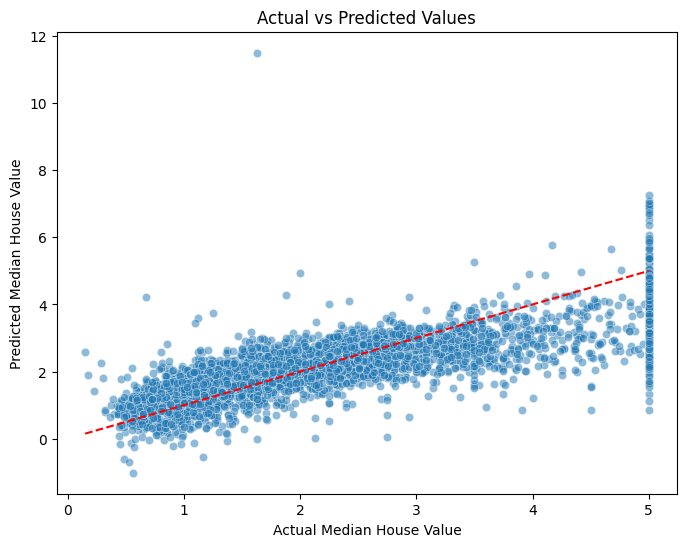

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values")
plt.show()

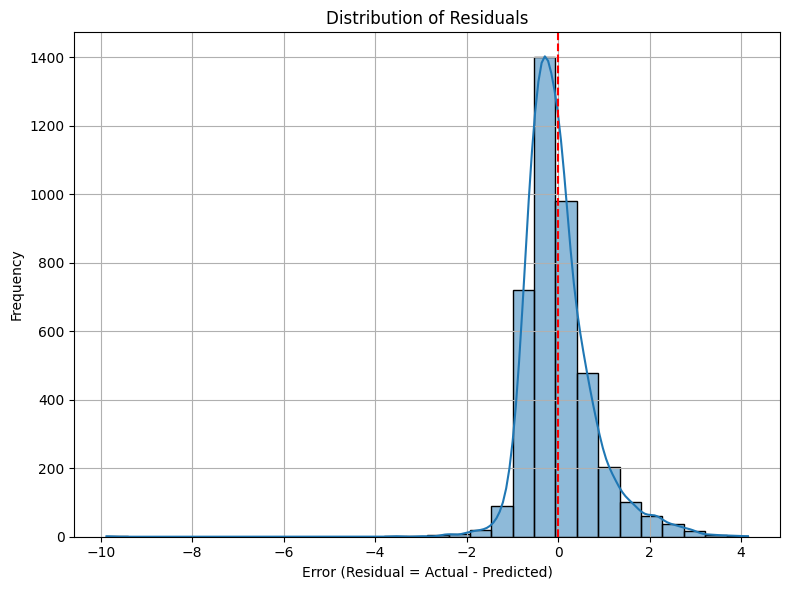

In [15]:
# residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Distribution of Residuals")
plt.xlabel("Error (Residual = Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

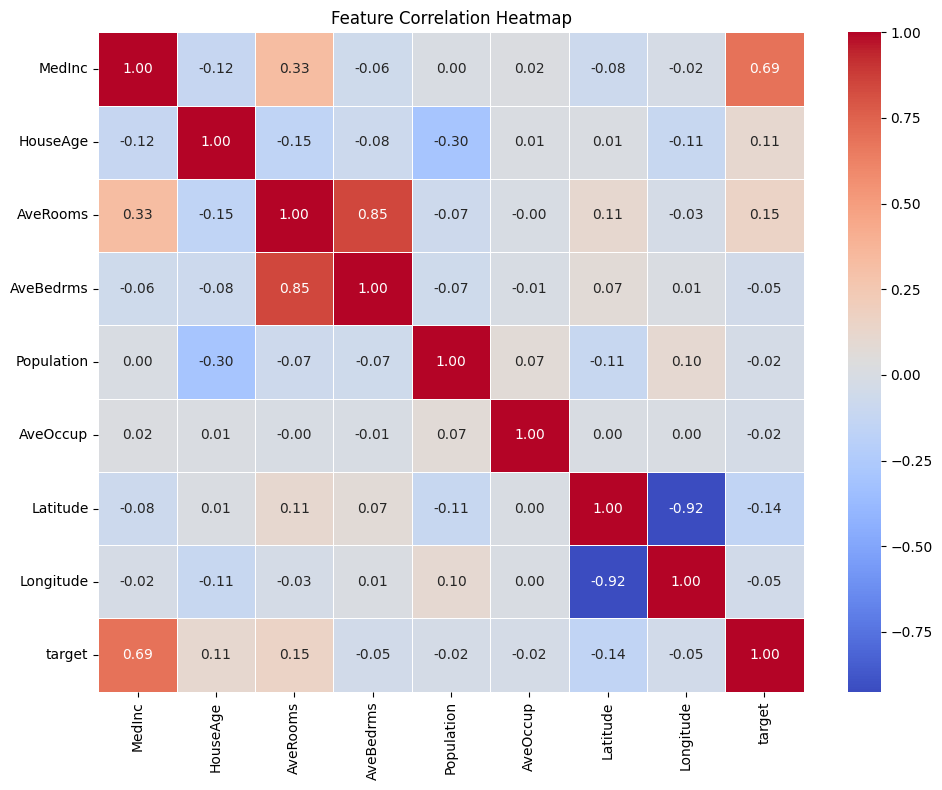

In [16]:
# Feature correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [19]:
# 8. Evaluation metrics

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.575787706032451
Mean Absolute Error: 0.5332001304956565
Mean Squared Error: 0.5558915986952442
Root Mean Squared Error: 0.7455813830127763


In [20]:
# 9. View predictions
comparison = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
print(comparison)

    Actual  Predicted
0  0.47700   0.719123
1  0.45800   1.764017
2  5.00001   2.709659
3  2.18600   2.838926
4  2.78000   2.604657


### Predictive System

In [ ]:
# New data point (sample values)
new_data = np.array([[8.5, 30, 6, 1.2, 1000, 3.5, 34.25, -118.5]])  # shape (1, 8)
new_data_scaled = scalar.transform(new_data)
predicted_value = model.predict(new_data_scaled)

print("Predicted Median House Value (in $100,000s):", predicted_value[0])

Predicted Median House Value (in $100,000s): 4.284161880111537


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
